# Exploratory Data Analysis for SuperMarket Sales Data using Python

**Purpose:**
    this project serves as a demonstration of fundamental understanding of data analysis with the python programming language
    
**Tools Used:**
    Kaggle (for dataset), Python, Jupyter Notebook

## COLLECT DATA

In [ ]:
##I will be using Sales data for a SuperMarket Chain from Kaggle.
##Data Source: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

In [84]:
#import libraries: pandas, numpy, seaborn, matplotlib, kaggle, zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
import zipfile

In [2]:
#get  datset from kaggle
!kaggle datasets download -d aungpyaeap/supermarket-sales

  0%|                                               | 0.00/35.9k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 35.9k/35.9k [00:00<00:00, 394kB/s]


In [3]:
zipfile_name = 'supermarket-sales.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [91]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## DATA CLEANING AND PREP

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
df.shape

(1000, 17)

In [8]:
#we see there are 1000 records check that they is a unique value for invoice id
df['Invoice ID'].nunique()

1000

In [10]:
##check for duplicates
df.duplicated().sum()

0

In [11]:
##check for nulls
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [12]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [93]:
#rename columns remove spaces
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax_5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'Rating'],
      dtype='object')

In [94]:
#camel case column names for consistency
df.columns=df.columns.str.title()
df.columns

Index(['Invoice_Id', 'Branch', 'City', 'Customer_Type', 'Gender',
       'Product_Line', 'Unit_Price', 'Quantity', 'Tax_5%', 'Total', 'Date',
       'Time', 'Payment', 'Cogs', 'Gross_Margin_Percentage', 'Gross_Income',
       'Rating'],
      dtype='object')

In [95]:
#convert date to date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [58]:
#recheck types
df.dtypes

Invoice_Id                         object
Branch                             object
City                               object
Customer_Type                      object
Gender                             object
Product_Line                       object
Unit_Price                        float64
Quantity                            int64
Tax_5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
Cogs                              float64
Gross_Margin_Percentage           float64
Gross_Income                      float64
Rating                            float64
dtype: object

## KPIs

In [59]:
#Average Rating by Branch
df.groupby('Branch')['Rating'].mean()

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64

In [60]:
#Average CoGs by branch
df.groupby('Branch')['Cogs'].mean()

Branch
A    297.480029
B    304.640482
C    321.047348
Name: Cogs, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

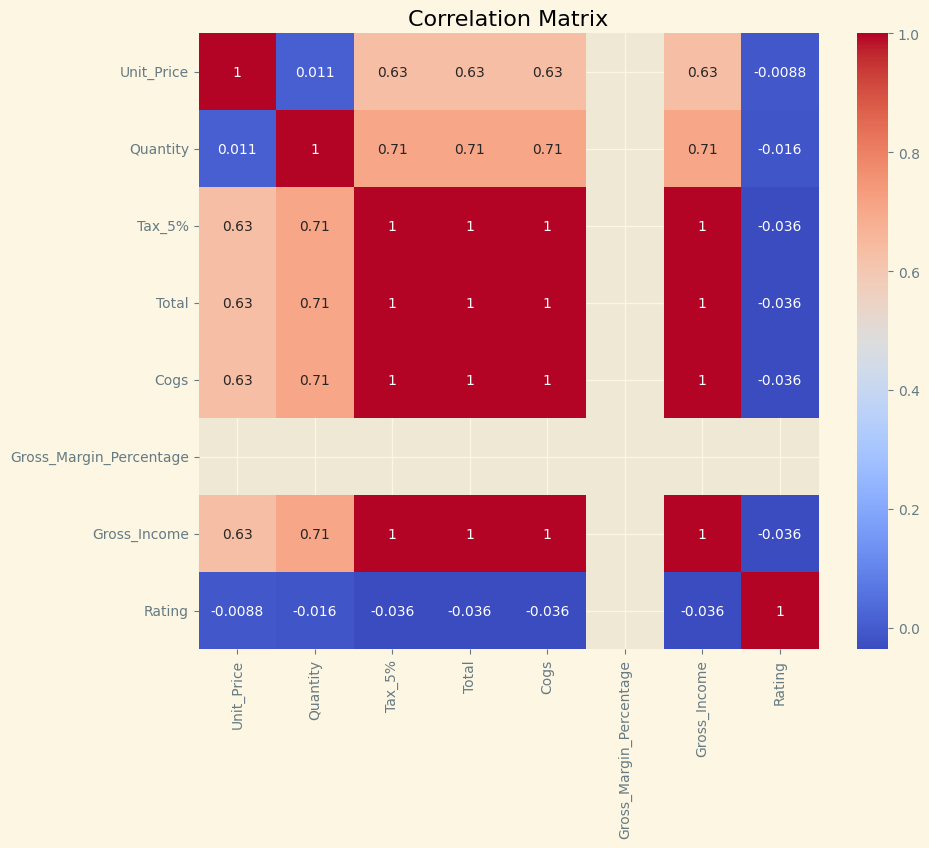

In [64]:
#correlation heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.style.use('Solarize_Light2')
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
#very weak negative linear correlation 
#as the 'Rating' increases, the 'Quantity' tends to decrease, and vice versa.

In [96]:
df['Average_Transaction_Value'] = df['Total'] / df['Quantity']
df['Average_Profit_Per_Sale'] = (df['Total'] - df['Cogs']) / df['Quantity']

print("Average Transaction Value:", df['Average_Transaction_Value'].mean())
print("Average Profit Per Sale:", df['Average_Profit_Per_Sale'].mean())

Average Transaction Value: 58.45573649999999
Average Profit Per Sale: 2.7836065


In [97]:
#Print all unique ratings - they are float points ranging from 4-10
unique_ratings = df['Rating'].unique()
print("Unique Ratings:", sorted(unique_ratings))

Unique Ratings: [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0]


## Visualizations

Text(0.5, 1.0, 'Distribution of Ratings')

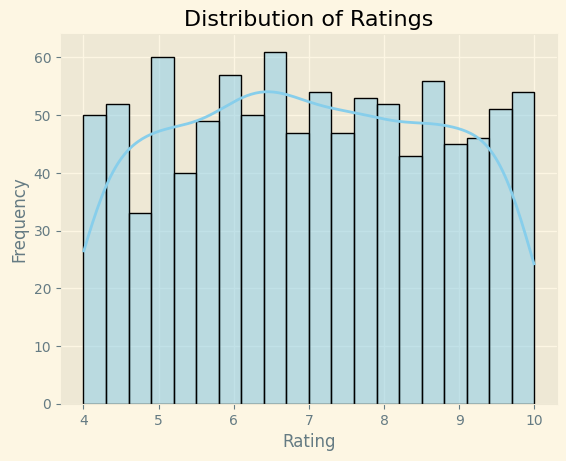

In [67]:
##Histogram displaying the frequency of ratings
sns.histplot(data=df,x='Rating',bins=20,kde=True,color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

Text(0.5, 1.0, 'Distribution of Payment Methods')

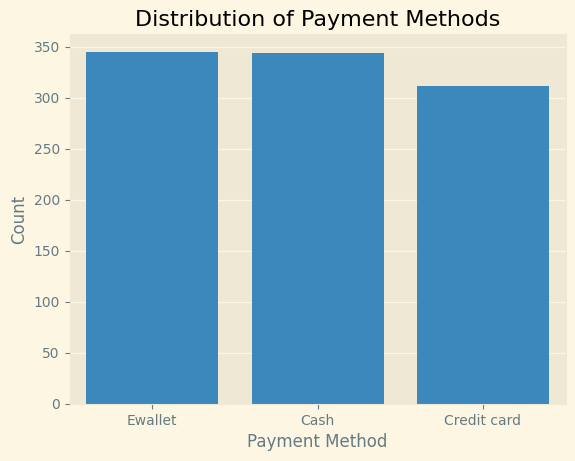

In [68]:
#countplot : counts of payment methods
sns.countplot(data=df, x='Payment')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of Payment Methods')

Text(0.5, 1.0, 'Distribution of Payment Methods by Store')

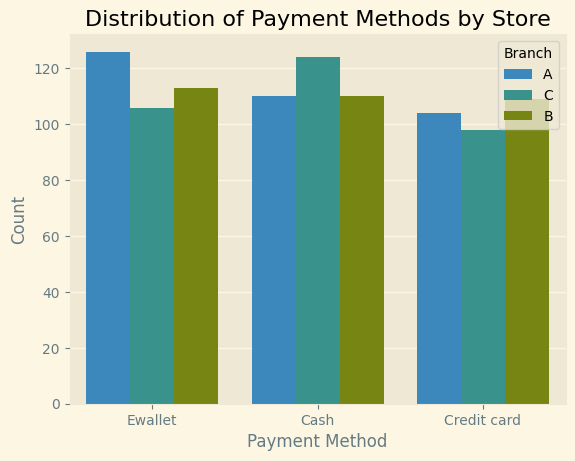

In [69]:
#count of payments by branch
sns.countplot(data=df, x='Payment',hue='Branch')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of Payment Methods by Store')

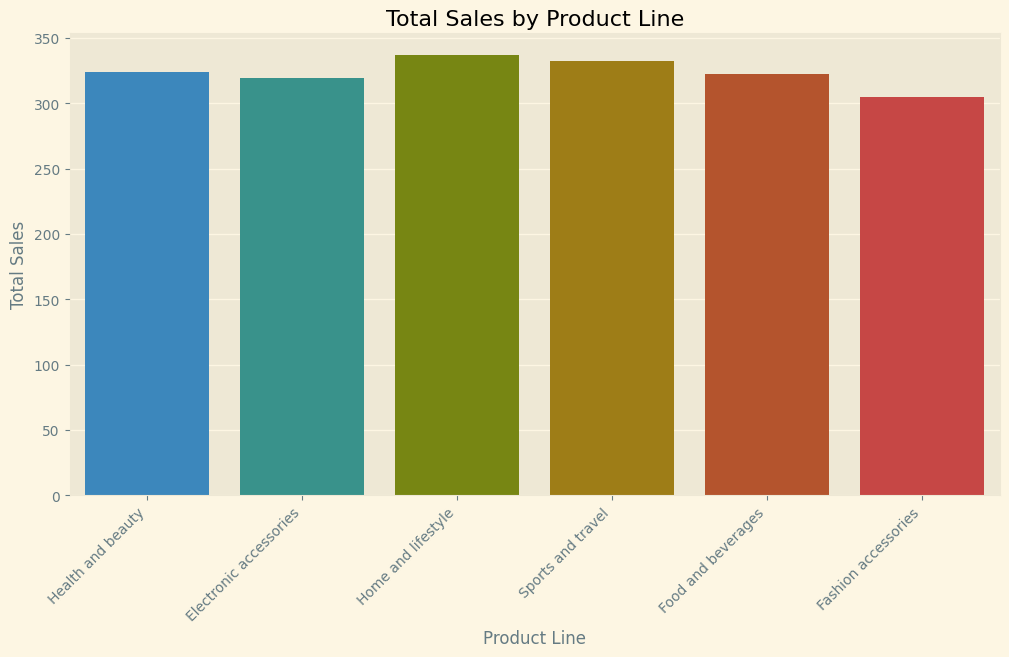

In [77]:
#transactions by product line 
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Product_Line', y='Total', hue='Product_Line', errorbar=None)
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45, ha='right')
plt.show()


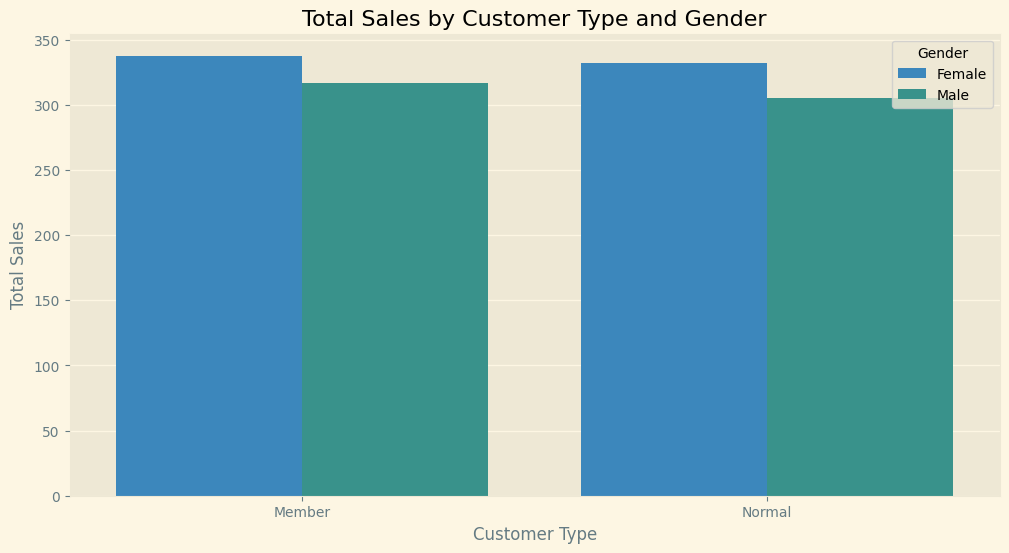

In [79]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Customer_Type', y='Total', hue='Gender', errorbar=None)
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer Type and Gender')
plt.show()

Text(0.5, 1.0, 'Customer Segmentation based on Total Spending')

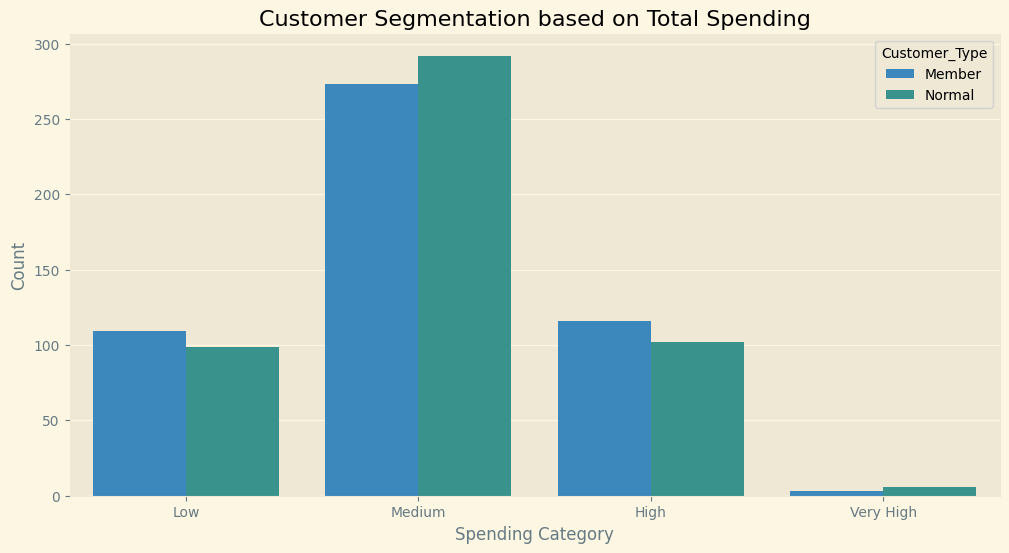

In [98]:
#Segmentation based on total spending
df['Spending_Category'] = pd.cut(df['Total'], bins=[0, 100, 500, 1000, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Spending_Category', hue='Customer_Type')
plt.xlabel('Spending Category')
plt.ylabel('Count')
plt.title('Customer Segmentation based on Total Spending')


/var/folders/xb/dkg9c6t17xz5yks0jdqm_h2w0000gn/T/ipykernel_11878/3856528228.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


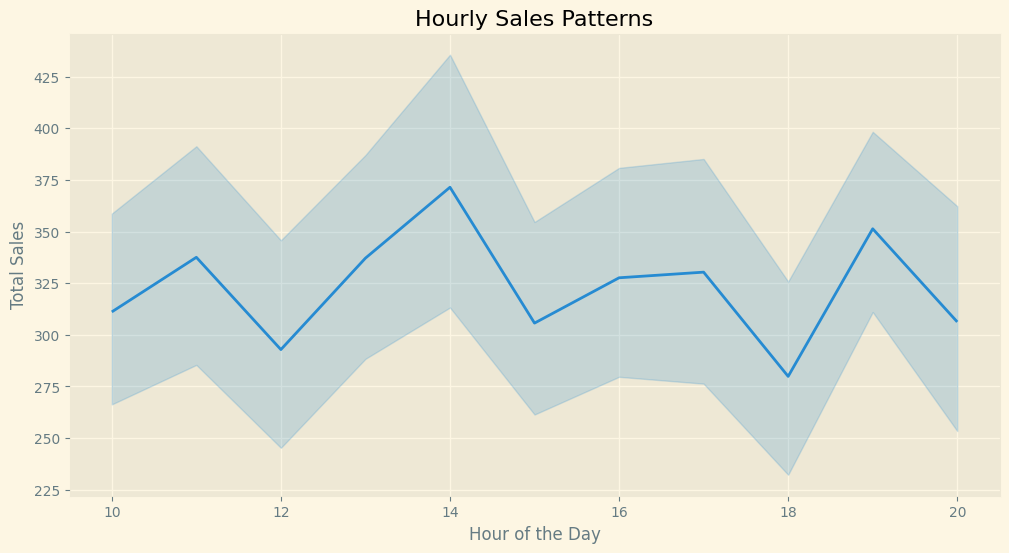

In [99]:

df['Hour'] = pd.to_datetime(df['Time']).dt.hour

#hourly sales patterns
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Hour', y='Total')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Hourly Sales Patterns')
plt.show()

**INSIGHTS**
* the busiest hours sre 11am, 2pm, and 7pm; this may help in planning staff schedules 


## CONCLUSION

The EDA process can be further developed to discover additional patterns and answer endless analytics questions.

I will conclude this project here as it fulfils my purpose of demonstrating skills: utilizing Python for data analysis.

Potentially, the next steps could involve creating a report containing various dynamic visualizations (using Python or another BI tool like Tableau) to present the results to stakeholders. Or we could indulge in data modelling, where we could run prediction algorithms like multiple linear regression on the data to predict the most profitable days or foot traffic given the different factors/variables.